In [1]:
#| default_exp temp_baseline_filter

In [52]:
%matplotlib widget

In [2]:
#| hide 
from nbdev.showdoc import *
import nbdev
from nbdev import nbdev_export

In [3]:
#| export 
from ITS_LIVE_TOOL import datacube_tools, interactive, obj_setup

In [4]:
#| export
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [66]:
data_map = interactive.Widget()

In [67]:
data_map.display()

In [68]:
glacier = obj_setup.create_glacier_from_click(data_map, 0)

In [69]:
glacier_point = obj_setup.create_glacier_point_from_click(data_map, 0, 'label')

original xy [-140.45098036349734, 60.096725719146775] 4326 maps to datacube (-3296984.1514304676, 314616.7987240129) EPSG:3413
original xy [-140.45098036349734, 60.096725719146775] 4326 maps to datacube (-3296984.1514304676, 314616.7987240129) EPSG:3413
subset and load at  48.53 seconds


In [70]:
glacier_point

## Find long-term speed at this point

In [71]:
ds =  glacier_point.cube_around_point

ds_long = ds.where(ds.img_separation >= 365, drop=True)

In [25]:
ds

<xarray.Dataset>
Dimensions:                (mid_date: 21889, x: 3, y: 4)
Coordinates:
  * mid_date               (mid_date) datetime64[ns] 2021-12-23T17:02:00.2112...
  * x                      (x) float64 3.729e+05 3.73e+05 3.731e+05
  * y                      (y) float64 3.147e+06 3.146e+06 3.146e+06 3.146e+06
    step_count             (mid_date) int64 3 4 5 6 ... 74642 74646 74655 74664
    mapping                int64 0
Data variables:
    v                      (mid_date, y, x) float32 nan 15.0 nan ... 15.0 18.0
    vy                     (mid_date, y, x) float32 nan 7.0 nan ... -15.0 -18.0
    vx                     (mid_date, y, x) float32 nan 13.0 nan ... nan 4.0 0.0
    v_error                (mid_date, y, x) float32 nan 34.0 nan ... nan 3.0 3.0
    satellite_img1         (mid_date) object '2A' '2A' '1A' '2B' ... '8' '7' '8'
    satellite_img2         (mid_date) object '2B' '2A' '1A' '2B' ... '9' '8' '8'
    acquisition_date_img1  (mid_date) datetime64[ns] 2021-12-06T05:02:01 ... ...
    acquisition_date_img2  (mid_date) datetime64[ns] 2022-01-10T05:01:59 ... ...
    img_separation         (mid_date) float64 35.0 70.0 13.0 ... 168.0 496.0
Attributes: (12/19)
    Conventions:                CF-1.8
    GDAL_AREA_OR_POINT:         Area
    author:                     ITS_LIVE, a NASA MEaSUREs project (its-live.j...
    autoRIFT_parameter_file:    http://its-live-data.s3.amazonaws.com/autorif...
    datacube_software_version:  1.0
    date_created:               25-Sep-2023 21:40:15
    ...                         ...
    s3:                         s3://its-live-data/datacubes/v2/N20E080/ITS_L...
    skipped_granules:           s3://its-live-data/datacubes/v2/N20E080/ITS_L...
    time_standard_img1:         UTC
    time_standard_img2:         UTC
    title:                      ITS_LIVE datacube of image pair velocities
    url:                        https://its-live-data.s3.amazonaws.com/datacu...

In [72]:
ds_long.v.median(dim=['x','y','mid_date'])

<xarray.DataArray 'v' ()>
array(5.)
Coordinates:
    mapping  int64 0

In [73]:
ds_sub = ds.where(ds.img_separation >= 60, drop=True)

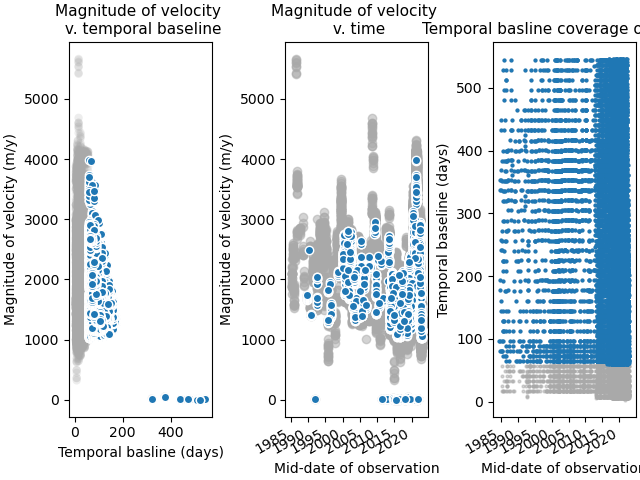

In [74]:
fig, axs = plt.subplots(ncols=3, constrained_layout=True)

ds[['img_separation','v']].plot.scatter(x='img_separation',y='v', ax=axs[0], marker='o', edgecolor='None' , color='darkgrey', alpha = 0.2);
ds_sub[['img_separation','v']].plot.scatter(x='img_separation',y='v', ax=axs[0], marker='o',)

ds['v'].plot.scatter(x='mid_date', y='v', ax=axs[1], alpha=0.5, color='darkgrey')
ds_sub['v'].plot.scatter(x='mid_date', y='v', ax=axs[1])

ds.img_separation.plot(linestyle='None', marker='o', markersize=2, color='darkgrey', alpha = 0.5, ax=axs[2])
ds_sub.img_separation.plot(linestyle='None', marker='o', markersize=2, ax=axs[2])

axs[0].set_ylabel('Magnitude of velocity (m/y)')
axs[1].set_ylabel('Magnitude of velocity (m/y)')
axs[2].set_ylabel('Temporal baseline (days)')

axs[0].set_xlabel('Temporal basline (days)')
axs[1].set_xlabel('Mid-date of observation')
axs[2].set_xlabel('Mid-date of observation')

axs[0].set_title('Magnitude of velocity \n v. temporal baseline', fontsize=11)
axs[1].set_title('Magnitude of velocity \n v. time', fontsize=11)
axs[2].set_title('Temporal basline coverage over time', fontsize=11);
